<a href="https://colab.research.google.com/github/bahonsi/Machine-Learning/blob/master/Apple_stock_prices_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 30 day stock price.

For this project I aimed to archive the following task: 
- Import data from a web source
- Present the data
- Visualise the data (Closing price, Adjusted close & high and low)
- Create a new column in the data frame 
- Scale data 
- Compile the model
- Train data using 80% 
- Test data using 20 % 
- Plot a graph 
- Reshape the data into the shape accepted by the LSTM
- Plot/Create the data for the graph
- Predict the closing price






In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
#Get the stock data from Yahoo
df = web.DataReader('AAPL', data_source='yahoo', start='2018-08-04', end='2019-08-30') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-06,209.250000,207.070007,208.000000,209.070007,25425400.0,203.506500
2018-08-07,209.500000,206.759995,209.320007,207.110001,25587400.0,201.598648
2018-08-08,207.809998,204.520004,206.050003,207.250000,22525500.0,201.734955
2018-08-09,209.779999,207.199997,209.529999,208.880005,23492600.0,203.321579
2018-08-10,209.100006,206.669998,207.360001,207.529999,24611200.0,202.715927
...,...,...,...,...,...,...
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,204.830002
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,202.518738
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,203.877731


In [ ]:
#Showing the number of rows and columns
df.shape

(270, 6)

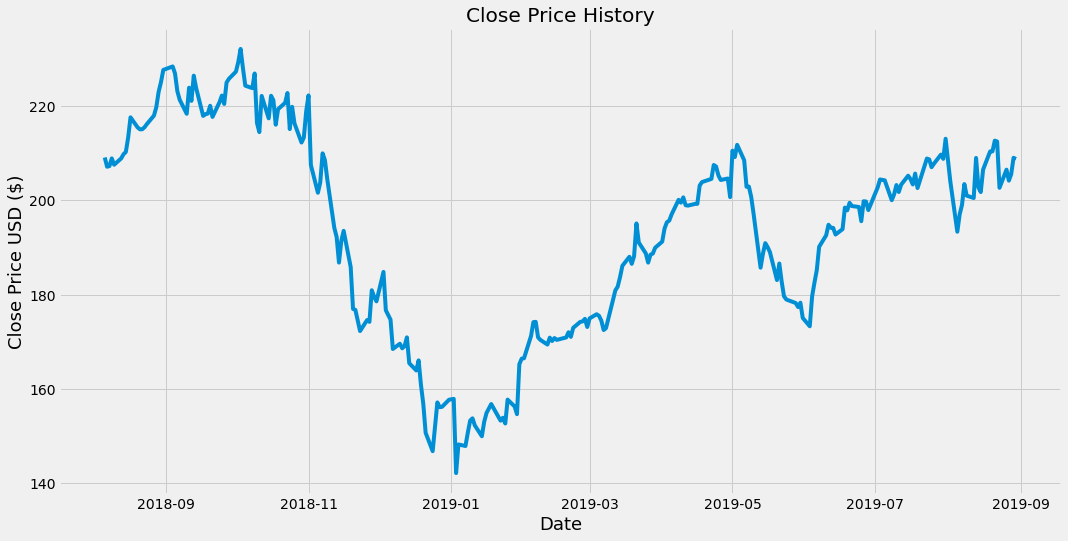

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model.(Training is 80%)
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
#Scale all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(30,len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
186/186 [==============================] - 4s 21ms/step - loss: 0.0223


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 30: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
#Get all of the rows from index 170 to the rest and all of the columns (in this case it's only column 'Close'), so 270 - 170 = 100 rows of data
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) #Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.321861734813619

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


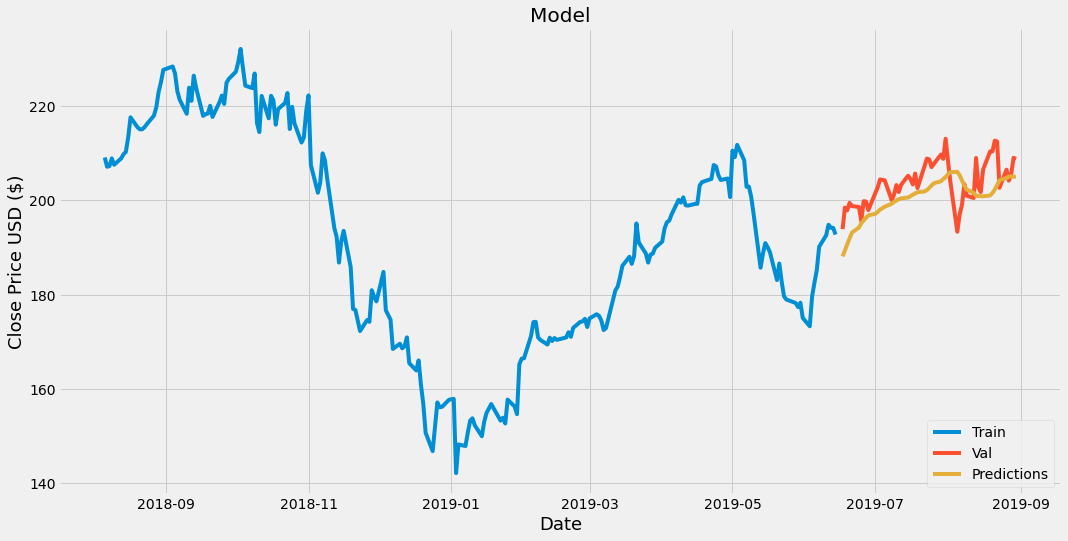

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-06-17,193.889999,188.112350
2019-06-18,198.449997,189.377991
2019-06-19,197.869995,190.691376
2019-06-20,199.460007,191.937668
2019-06-21,198.779999,193.147385
2019-06-24,198.580002,194.227264
2019-06-25,195.570007,195.142181
2019-06-26,199.800003,195.731812
2019-06-27,199.740005,196.286255
